In [2]:
!telnet 172.18.0.27 9000

Trying 172.18.0.27...
Connected to 172.18.0.27.
Escape character is '^]'.
^C
Connection closed by foreign host.


In [9]:
import os

In [10]:
os.environ

environ{'USER': 'root',
        'VSCODE_WSL_EXT_LOCATION': '/mnt/c/Users/Anton/.vscode/extensions/ms-vscode-remote.remote-wsl-0.88.2',
        'SHLVL': '1',
        'HOME': '/root',
        'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/0/bus',
        'WSL_DISTRO_NAME': 'Ubuntu-22.04',
        'WAYLAND_DISPLAY': 'wayland-0',
        'LOGNAME': 'root',
        'NAME': 'DESKTOP-CPBC9TL',
        'WSL_INTEROP': '/run/WSL/727_interop',
        'PULSE_SERVER': 'unix:/mnt/wslg/PulseServer',
        '_': '/opt/miniconda3/envs/dl_env/bin/python',
        'TERM': 'xterm-color',
        'PATH': '/opt/miniconda3/envs/dl_env/bin:/root/.vscode-server/bin/ea1445cc7016315d0f5728f8e8b12a45dc0a7286/bin/remote-cli:/root/.local/bin:/opt/miniconda3/envs/dl_env/bin:/opt/miniconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/lib/wsl/lib:/mnt/c/Program Files (x86)/Common Files/Oracle/Java/javapath:/mnt/c/WINDOWS/system32:/mnt/c/WINDOWS:/mnt/c/WIND

In [14]:
import aioboto3

ENDPOINT_URL = 'http://172.18.0.4:9000'
ACCESS_KEY = 'fcEPzXwRe9tAtUIjco0o'
SECRET_KEY = 'Y85wp1asb1EwZsXhfCz73kWhuQYoO4le6dhXqRhO'
BUCKET_NAME = 'animals'
VERSION='s3v4'

In [15]:
class S3Client:
    def __init__(self, endpoint_url = ENDPOINT_URL, access_key = ACCESS_KEY, secret_key=SECRET_KEY, bucket_name=BUCKET_NAME, version='s3v4'):
        self.endpoint_url = endpoint_url
        self.access_key = access_key
        self.secret_key = secret_key
        self.bucket_name = bucket_name
        self.version = version
        self.session = aioboto3.Session(region_name='public-read')
        self.client = None
        
    async def create_bucket(self, bucket_name, region=None):
        """Создает бакет в S3 с указанным именем и регионом"""
        async with self.session.client("s3", endpoint_url=ENDPOINT_URL,aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY, region_name='public-read') as s3:
            await s3.create_bucket(Bucket=bucket_name)
            print(f'Бакет {bucket_name} успешно создан.')


    async def upload_file(self, file, filename: str):
        async with self.session.client("s3", endpoint_url=ENDPOINT_URL,aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY, region_name='public-read') as s3:
            await s3.upload_fileobj(file, self.bucket_name, filename)

    async def download_file(self, filename: str):
        s3_file: dict = {}
        async with self.session.resource("s3", endpoint_url=ENDPOINT_URL,aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY, region_name='public-read') as s3:
            bucket = await s3.Bucket(BUCKET_NAME)
            obj = await s3.Object(self.bucket_name, key=filename)
            s3_file = await obj.get()
            data = await s3_file['Body'].read()
            return data
        
        
            # async with aiofiles.open('local_filename', 'wb') as file:
            #     await file.write(data)
            
s3 = S3Client()

In [16]:
await s3.create_bucket(BUCKET_NAME)

Бакет animals успешно создан.


In [17]:
session = aioboto3.Session(region_name='public-read')

In [4]:
data = await s3.download_file("l_8744d668.jpg")

EndpointConnectionError: Could not connect to the endpoint URL: "http://172.18.0.27:9000/animals/l_8744d668.jpg"

In [20]:
from io import BytesIO
from PIL import Image

In [21]:
img = Image.open(BytesIO(data))

NameError: name 'data' is not defined

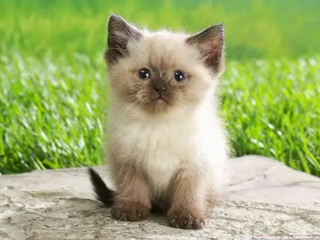

In [88]:
img

In [22]:
fl = open("/home/hack/l_8744d668 (1).jpg","rb")

In [23]:
async with session.client("s3", endpoint_url=ENDPOINT_URL,aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY, region_name='public-read') as s3:
    await s3.upload_fileobj(fl, "animals", "first/l_8744d668.jpg")